In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
# Train test split

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression

In [12]:
log=LogisticRegression()

In [13]:
log.fit(xtrain,ytrain)

LogisticRegression()

In [14]:
log.score(xtest,ytest)

0.7835497835497836

In [15]:
print(log.coef_)

[[ 0.10143228  0.03358642 -0.01571102 -0.00134879 -0.00069745  0.0894367
   0.56049131  0.01705747]]


In [16]:
print(log.intercept_)

[-7.86828514]


In [17]:
y_pred=log.predict(xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [18]:
# Confusion matrics

from sklearn.metrics import classification_report,confusion_matrix

In [19]:
tn,fp,fn,tp=confusion_matrix(ytest,y_pred).ravel()

In [20]:
print(tp,fn)
print(fp,tn)

49 36
14 132


In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [22]:
accuracy_score(ytest,y_pred)

0.7835497835497836

In [23]:
precision_score(ytest,y_pred)

0.7777777777777778

In [24]:
recall_score(ytest,y_pred)

0.5764705882352941

In [25]:
f1_score(ytest,y_pred)

0.6621621621621621

In [26]:
# ROC curves are very help with understanding the balanace bet true positive rate and false positive rate

from sklearn.metrics import roc_curve

In [27]:
fpr,tpr,threshold=roc_curve(ytest,y_pred)

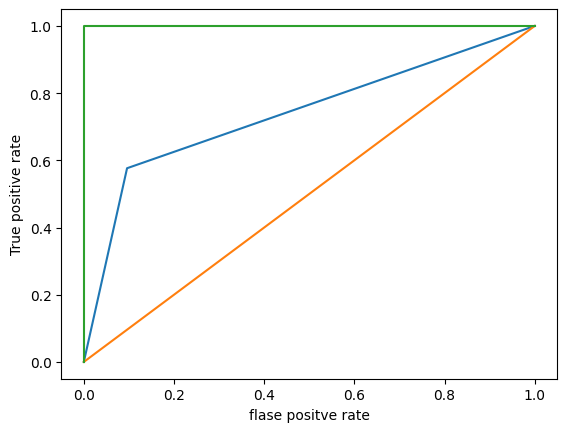

In [28]:
# Plotting the ROC Curve

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],label='random')
plt.plot([0,0,1],[0,1,1],label='prefect')
plt.xlabel('flase positve rate')
plt.ylabel('True positive rate')
plt.show()

In [29]:
# AUC Curve

from sklearn.metrics import roc_auc_score

In [30]:
auc=roc_auc_score(ytest,y_pred)

In [31]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

